## Benfordsches Gesetz


Das Benfordsche Gesetz beschreibt die **Verteilung von Ziffern** in empirischen Datensätzen und beruht auf der Tatsache, dass die Ziffern in einem Zahlensystem hierarchisch aufeinander aufbauen: 
Es beginnt mit der 1, dann folgt die 2, dann die 3 usw... 

Laut Benfordschen Gesetz ist zu erwarten, dass die Ziffer 1 häufiger vorkommt als die 2, die wiederum häufiger vorkommt als die 3. Die Ziffer 9 kommt entsprechend verhältnismäßig am seltensten vor.

Diese Vorhersagefähigkeit kann in Kombination mit bestimmten Naturgesetzen (z.B. dem natürlichen Wachstumsprozess 
--> energiesparend wachsen/überleben, etc.) oder Ökonomie (so günstig wie möglich einkaufen) wertvoll sein.

Die Benford-Analyse ist im Grunde eine **Ausreißeranalyse**: 
Wir vergleichen die Verteilung der Ziffern in Datenbeständen mit der Erwartungshaltung, dass das Benfordsche Gesetz eingehalten wird - falls nicht, besteht zumindest Diskussionsbedarf.


Die Wahrscheinlichkeit des Auftretens der ersten “anführenden” Ziffer d ist ein Logarithmus zur Basis B. 
Im alltäglichen Leben wird fast nur im Dezimalzahlensystem gearbeitet, also ist dort B = 10.

\begin{equation*}
p(d)=\log_{B}\left( 1 +\frac{1}{d} \right)
\end{equation*}


In [1]:
import math
 
[round(math.log10(1+1/float(i))*100.0, 1) for i in range(1,10)]

[30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

In [2]:
import numpy as np
 
x = np.arange(1,10)

benford = np.round(np.log10(1+1/x) * 100.0, decimals=1) # apply logarithm
benford

array([30.1, 17.6, 12.5,  9.7,  7.9,  6.7,  5.8,  5.1,  4.6])

In [3]:
import pandas as pd
 
benfordFrame = pd.DataFrame({'Digit': x, 'Benfords Law': benford})
benfordFrame


,Digit,Benfords Law
0,1,30.1
1,2,17.6
2,3,12.5
3,4,9.7
4,5,7.9
5,6,6.7
6,7,5.8
7,8,5.1
8,9,4.6


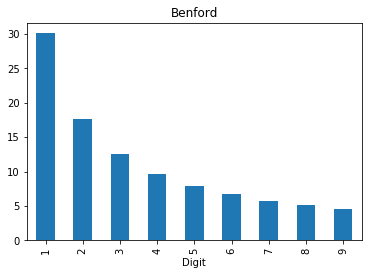

In [4]:
benfordFrame.plot('Digit', 'Benfords Law', kind='bar', title='Benford', legend=False)


## Analyse von "echten" Daten

Bei der folgenden Datenquelle handelt es sich um die Punkteverteilung einer Mathe-Klausur. Diese Verteilung folgt aus verschiedenen Gründen nicht einer Benfordschen Gesetzmäßigkeit. Hier soll nur der Versuch gezeigt werden wie man "echte" Datensätze aus einer Datei mit einer optimalen Benfordschen Verteilung grafisch vergleichen kann.

In [5]:
grades = np.loadtxt("noten.csv", skiprows=1)
gradesFrame = pd.DataFrame({'Prozente':grades})
firstDigits = [str(value)[0:1] for value in gradesFrame['Prozente']]

In [6]:
#consider only firstDigits != 0
percentDigits = np.asarray([[i, firstDigits.count(str(i))/float(len(gradesFrame['Prozente']))*100] for i in range(1, 10)])
percentDigits.T[1].sum()
Out: 94.0

In [7]:
#consider all firstDigits including 0 (e.g. you have 0x-values)
percentDigits = np.asarray([[i, firstDigits.count(str(i))/float(len(gradesFrame['Prozente']))*100] for i in range(0, 10)])
percentDigits.T[1].sum()
Out: 100.0

In [8]:
#create 2nd dataframe
percentDigitsFrame = pd.DataFrame({'Digit':percentDigits[:,0], 'Real Distribution':percentDigits[:,1]})
 

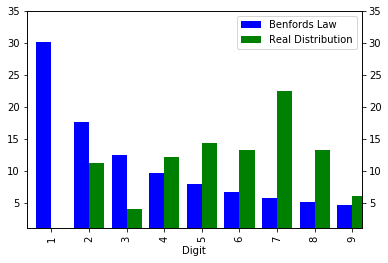

In [9]:
#comparison of the digit frequency with the expectation

import matplotlib.pyplot as pyplot 
 
fig = pyplot.figure()
 
ax = fig.add_subplot(111)
ax2 = ax.twinx()
 
percentDigitsFrame.plot('Digit', 'Real Distribution', kind='bar', ax=ax2, width = 0.4, color="green", position=0, legend=False)
benfordFrame.plot('Digit', 'Benfords Law', kind='bar', ax=ax, width = 0.4, color="blue", position=1, legend=False)
 
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
 
ax.set_ylim(1,35)
ax2.set_ylim(1,35)
 
pyplot.show()